#  Diabetes prediction dataset EDA

# About Authors: 
* Saif Ur Rehman
*  Zeeshan Shaukat
* Raja Haris
* Muhammad Hamza Shakeel
* Ahmad Hassan
* Awais Haleem

# About Dataset: 
The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

## Metadata
>* `Gender`: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.  
>* `Age` : Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset. 
>* `Hypertension` : Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0. 
>* `Heart_disease`	: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. 
>* `Smoking_history` : Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated.
>* `BMI`: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk.
>* `HbA1c_level`: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels.
>* `Blood_glucose_level`: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key.
>* `Diabetes`: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the

## Objectives:

The objective of exploratory data analysis (EDA) of the diabetes prediction dataset is to understand the data, identify patterns and trends, and develop hypotheses about the factors that contribute to diabetes. We will use data visualization techniques and statistical tests to explore the data and to develop a deeper understanding of the relationships between the features and the target variable (diabetes). We will also identify any outliers or anomalies in the data and assess its quality.

## Task:

We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization. During the coding process, we will document our observations. Ultimately, we will produce a summary and draw conclusions from our findings

# 1. Importing Libraries

### 1.1 We will use the follwoing libraries
>* `Pandas`: Data manipulation and analysis library.
>* `Numpy`: Numerical computing library.
>* `Matplotlib`: Data visualization library.
>* `Seaborn`: Statistical data visualization library.
>* `Plotly` : Interactive Data visualization library.
   

In [2]:
# use matplotlib inline to plot the graphs within the jupyter notebook
%matplotlib inline 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# set plt image size globally
plt.rcParams['figure.figsize'] = (15,6)

# 2. Loading, Transformation and Exploration  of dataset


### 2.1 Loading the dataset from a CSV file.


In [3]:
df = pd.read_csv("./hemogloba_data.csv")

* let's see the first 5 rows of the dataset to get a feel of how the data looks like

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


* let's check the number of rows and columns in the dataset


In [5]:
print(f"The number of rows are {df.shape[0]}, and columns are {df.shape[1]}")

The number of rows are 100000, and columns are 9


* Get a sneak peek of your data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Observations: 
>* We have 9 columns; 3 columns of float, 4 columns of int and 2 columns of object dtype.
>* There is no null values in any of the columns.
>* Memory usage is 6.9+ MB

### 2.2 Missing Values

* verify missing values

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

let's plot the missing values using heatmap

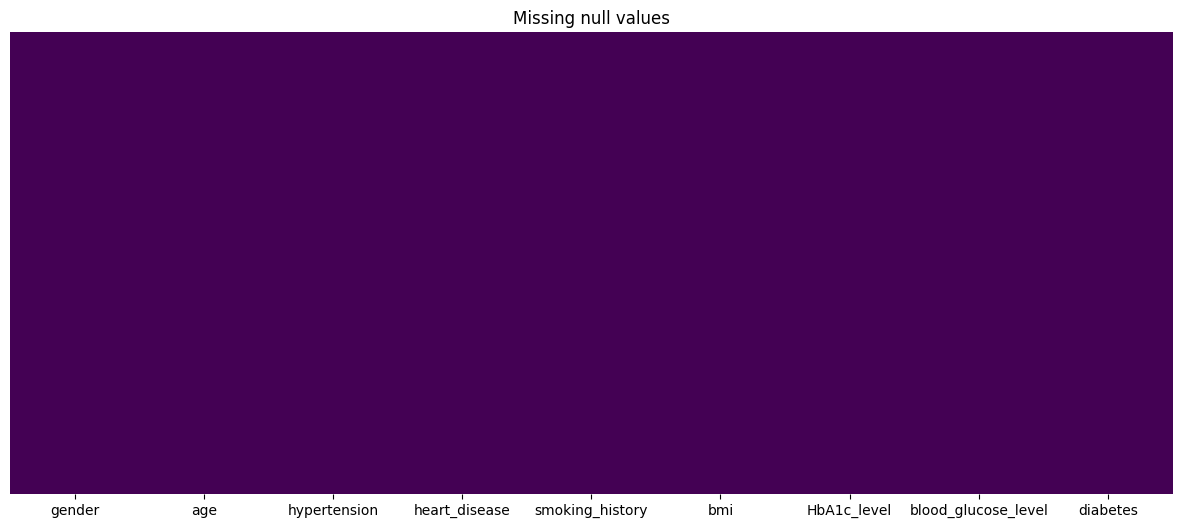

In [8]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing null values")
plt.show()

### 2.3 Duplicate values

let's check the duplicate values in the dataset

In [9]:
df.duplicated().sum()

3854

In [10]:

print(f'We have {df.duplicated().sum()} duplicated rows in the dataset \nWhich are {round(df.duplicated().sum() / len(df) * 100,2)}% of the dataset')

We have 3854 duplicated rows in the dataset 
Which are 3.85% of the dataset


This is minute observations and we can drop the duplicated rows to mantain the integrity of the dataset.

In [11]:
df.drop_duplicates(inplace=True)

### 2.3 Summary Statistics of numerical columns

In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### 2.4 unique values and value counts in non-numerical columns

* let's check the nuniqe values and counts in each non-numericale column

In [13]:
# take non_numeric columns
non_numeric_columns = df.select_dtypes(exclude=np.number).columns.tolist()
for col in non_numeric_columns:
    print(f"{col} has following {df[col].nunique()} unique values: \n{df[col].unique()}\n")
    print(f"Value counts for {col} are: \n{df[col].value_counts()}\n")

gender has following 3 unique values: 
['Female' 'Male' 'Other']

Value counts for gender are: 
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

smoking_history has following 6 unique values: 
['never' 'No Info' 'current' 'former' 'ever' 'not current']

Value counts for smoking_history are: 
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64



### 2.4 Distribution of the data

* Gender

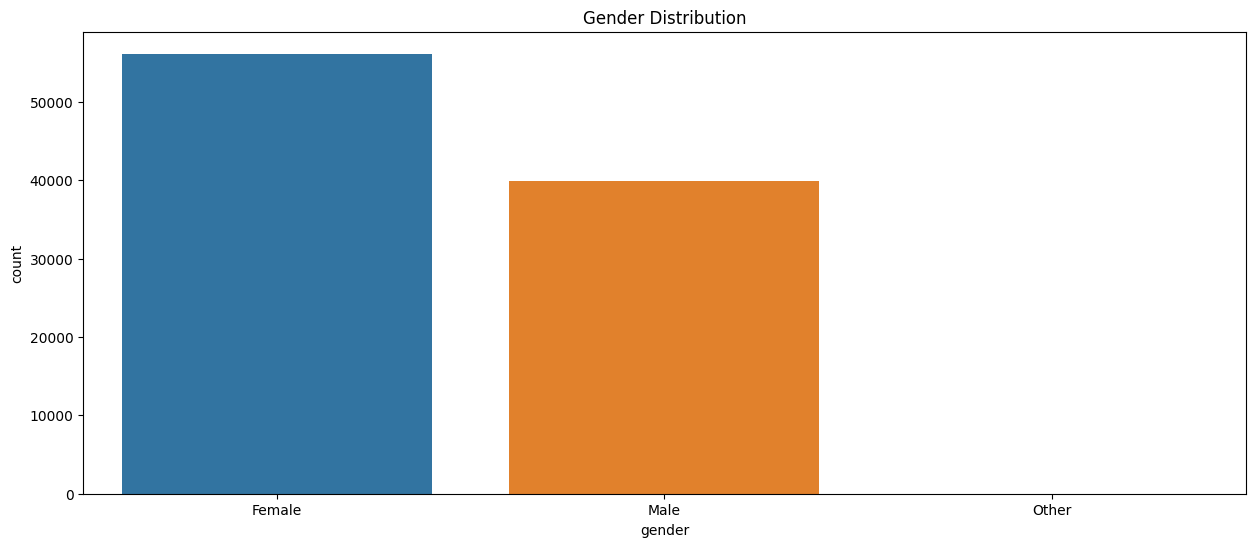

In [14]:
sns.countplot(df, x='gender')
plt.title("Gender Distribution")
plt.show()

* age

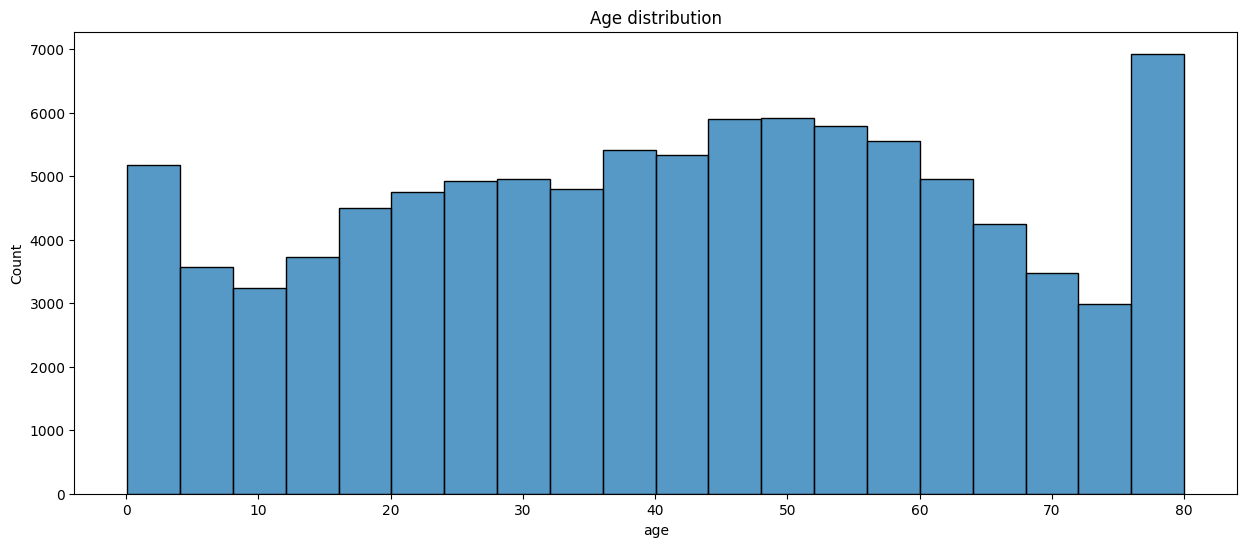

In [15]:
sns.histplot(df, x='age', bins=20)
plt.title("Age distribution")
plt.show()

We have almost uniform distribution of age in the dataset. We have all entries from every age group.

* Making new column with age categories from age column


In [44]:
bins = [0,10,18,30,50,80]
labels = ['children', 'teenagers', 'youngs', 'middle','old_age']
df['age_category'] = pd.cut(df['age'],bins = bins, labels = labels)

<Axes: xlabel='age_category', ylabel='count'>

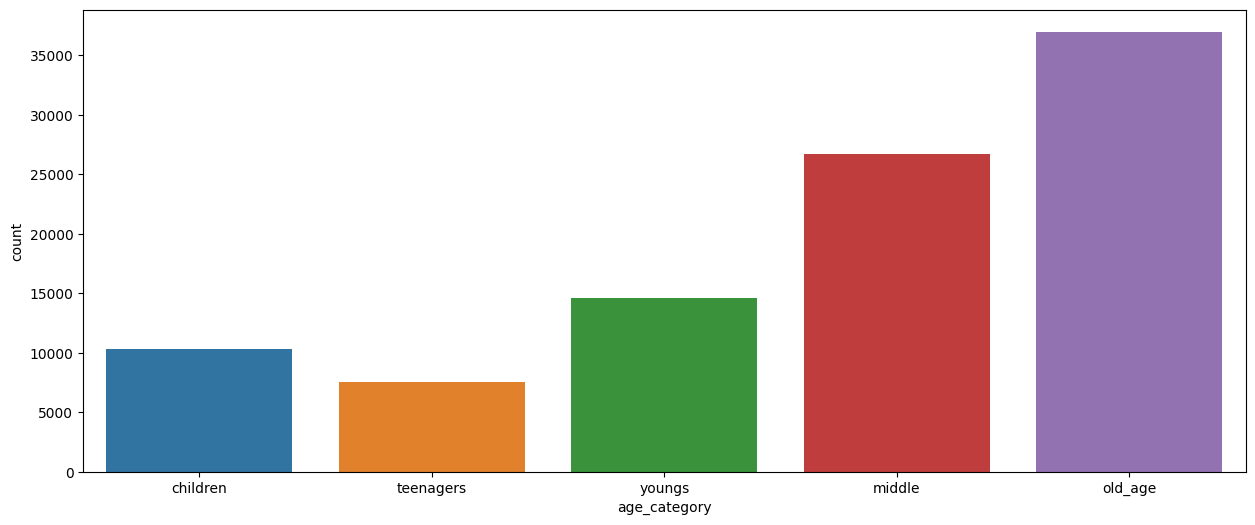

In [49]:
sns.countplot(x='age_category', data=df)

we have more old age people in our dataset

* let's see which people are more likely to have diabetes

In [47]:
df.groupby('age_category')['diabetes'].value_counts()

age_category  diabetes
children      0           10297
              1              29
teenagers     0            7431
              1              63
youngs        0           14389
              1             209
middle        0           25192
              1            1547
old_age       0           30355
              1            6634
Name: count, dtype: int64

<Axes: xlabel='age_category', ylabel='count'>

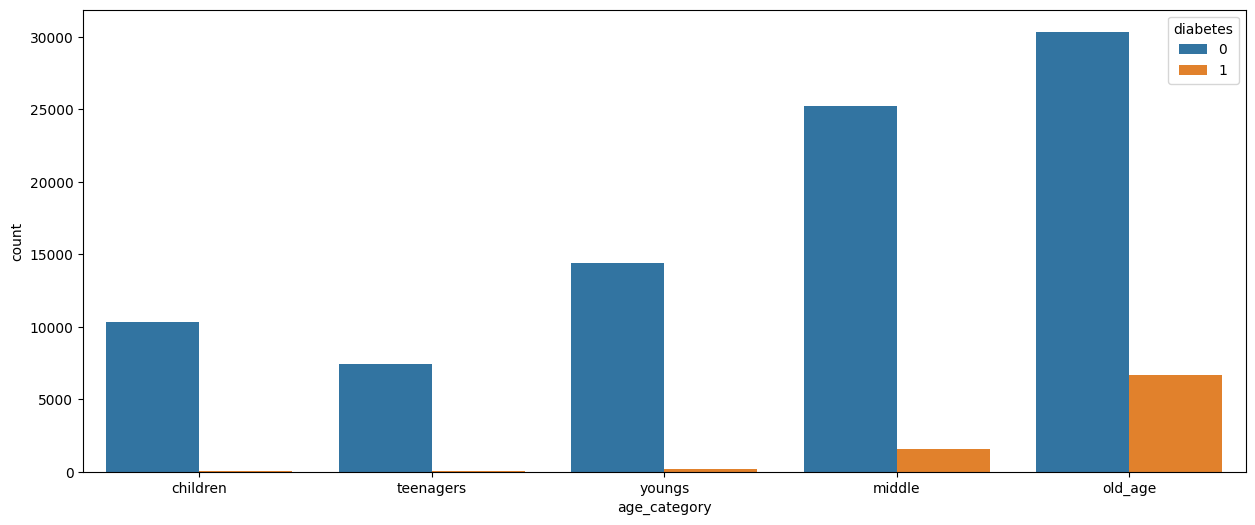

In [48]:
# make a plot to show diabetes distribution in each age category
sns.countplot(x='age_category', hue='diabetes', data=df)

Old age group is more in dataset and also have more diabetes patients.

In [50]:
# check Percentage of diabetes in each age category
df.groupby('age_category')['diabetes'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

age_category  diabetes
children      0           99.72%
              1            0.28%
teenagers     0           99.16%
              1            0.84%
youngs        0           98.57%
              1            1.43%
middle        0           94.21%
              1            5.79%
old_age       0           82.06%
              1           17.94%
Name: proportion, dtype: object

Old age group has about 19% of diabetes patients

* hypertension

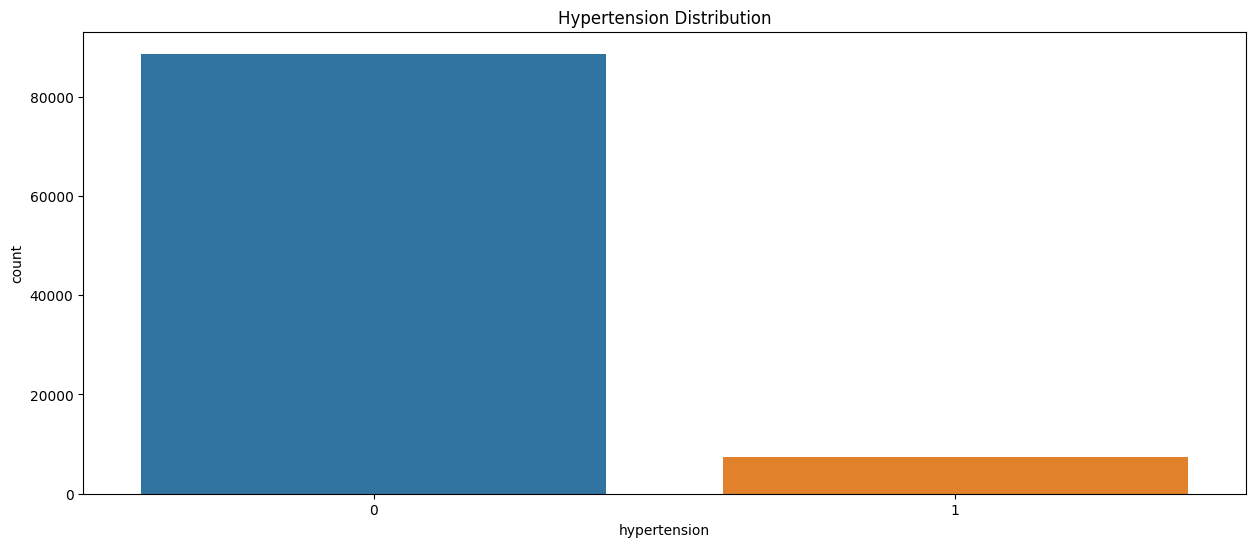

In [16]:
sns.countplot(df, x='hypertension')
plt.title("Hypertension Distribution")
plt.show()

* heart_disease

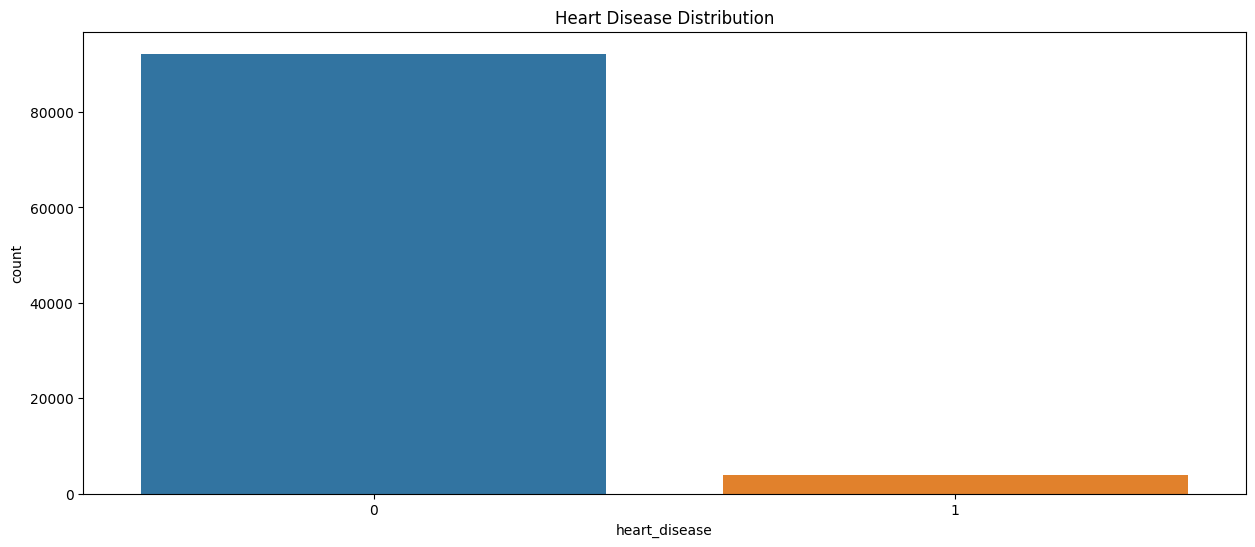

In [17]:
sns.countplot(df, x='heart_disease')
plt.title("Heart Disease Distribution")
plt.show()

more people have no heart disease. very few people have heart disease

<Axes: xlabel='diabetes', ylabel='count'>

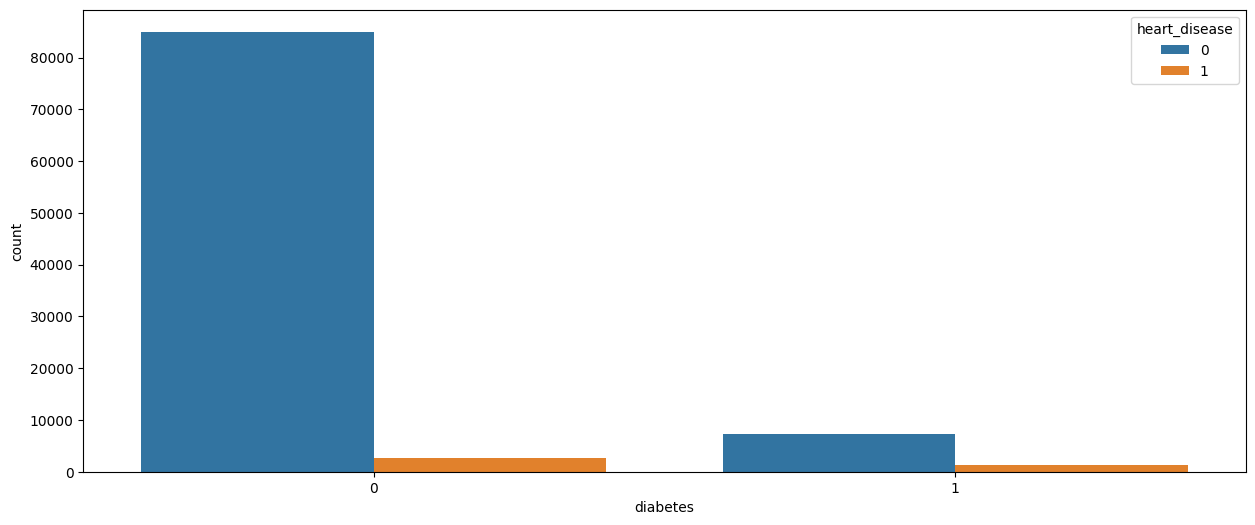

In [53]:
# Is heart disease and diabetes related?
sns.countplot(x='diabetes', hue='heart_disease', data=df)

There is no relation between heart disease and diabetes


In [54]:
df[['heart_disease', 'diabetes']].corr()

,heart_disease,diabetes
heart_disease,1.000000,0.170711
diabetes,0.170711,1.000000


* smoking_history

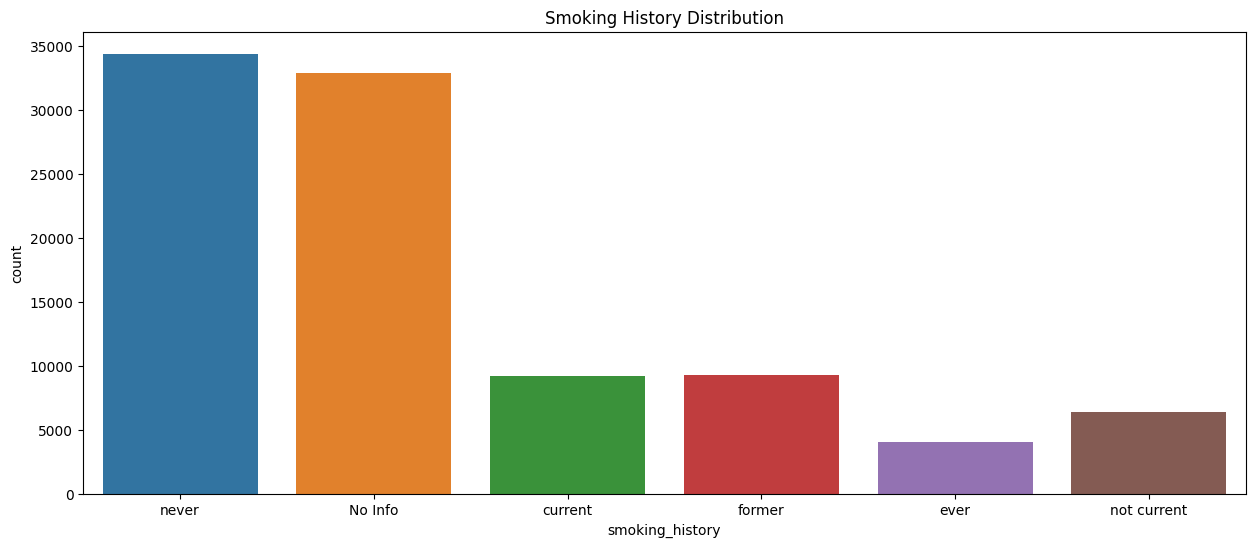

In [18]:
sns.countplot(df, x='smoking_history')
plt.title("Smoking History Distribution")
plt.show()

* bmi

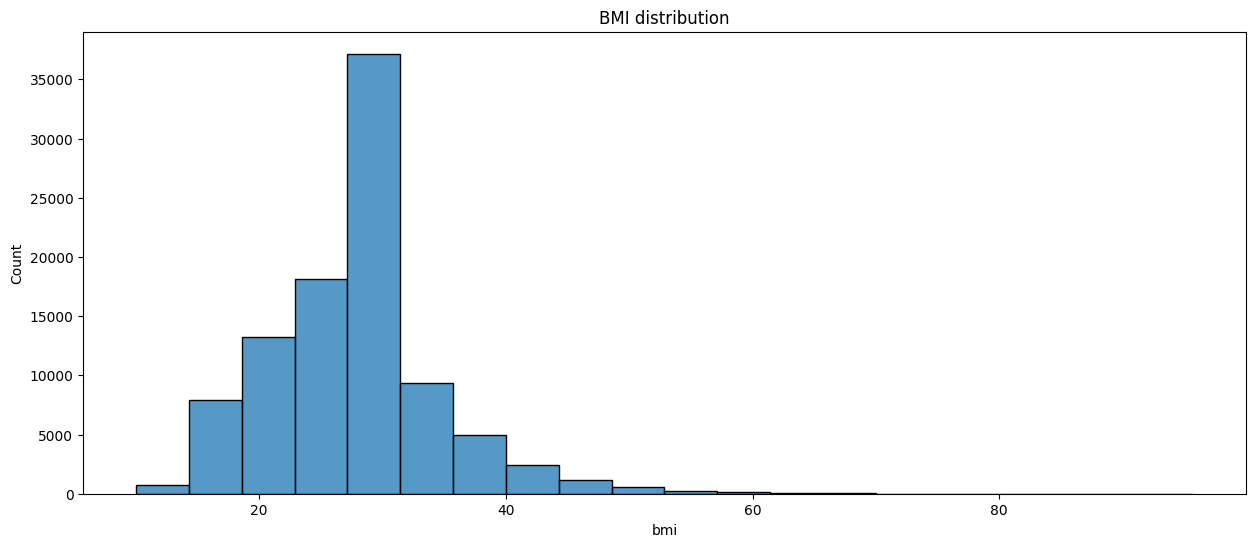

In [19]:
sns.histplot(df, x='bmi', bins=20)
plt.title("BMI distribution")
plt.show()

BMI Distribution is slighly right skewed. we have potential outliers in the dataset.

![bmi_chart](https://cdn.vertex42.com/ExcelTemplates/Images/bmi-chart.gif)\
[bmi_chart](https://cdn.vertex42.com/ExcelTemplates/Images/bmi-chart.gif)

* HbA1c_level

* Making a new column for BMI category

In [20]:
# binn bime into 4 categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

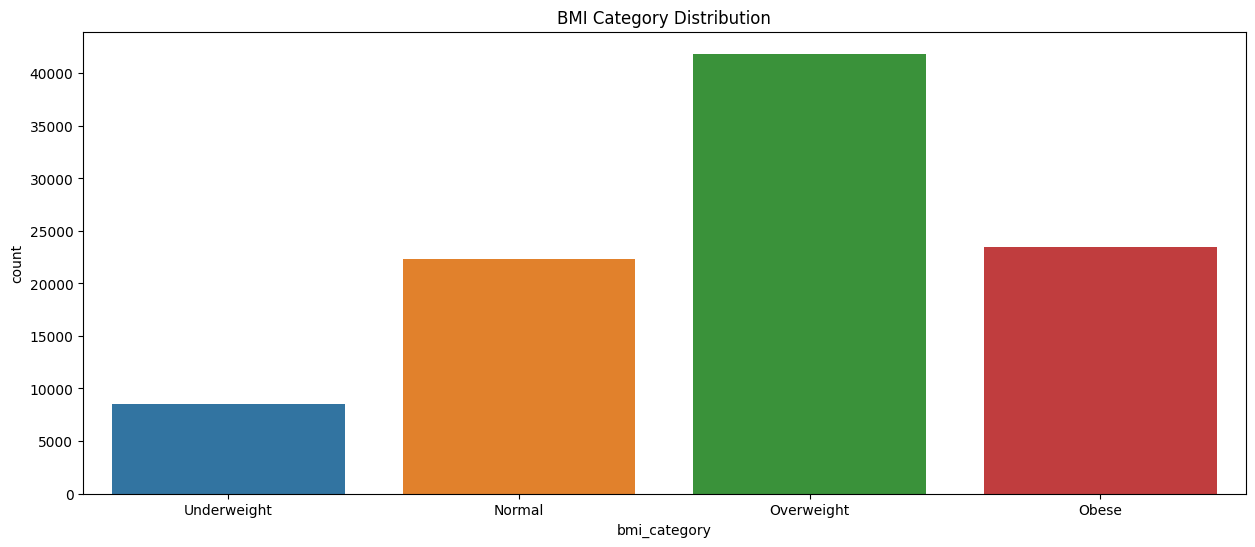

In [21]:
# lets see the distribution of bmi categories
sns.countplot(df, x='bmi_category')
plt.title("BMI Category Distribution")
plt.show()

Text(0.5, 1.0, 'BMI Category Distribution')

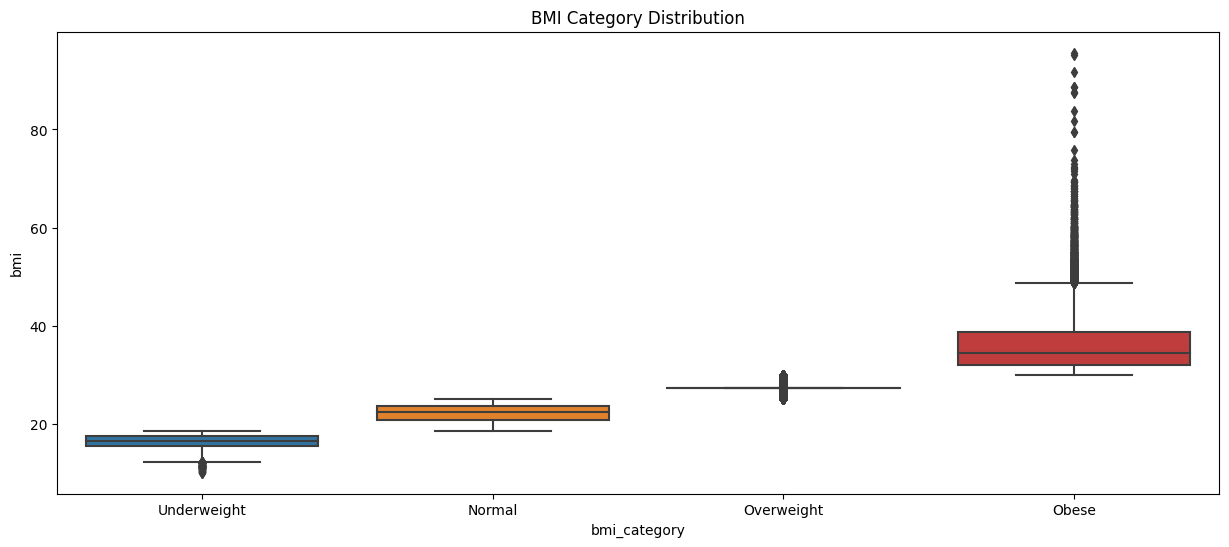

In [22]:
# lets see the outliers in bmi_ category
sns.boxplot(df, x='bmi_category', y='bmi')
plt.title("BMI Category Distribution")


<Axes: xlabel='bmi', ylabel='Count'>

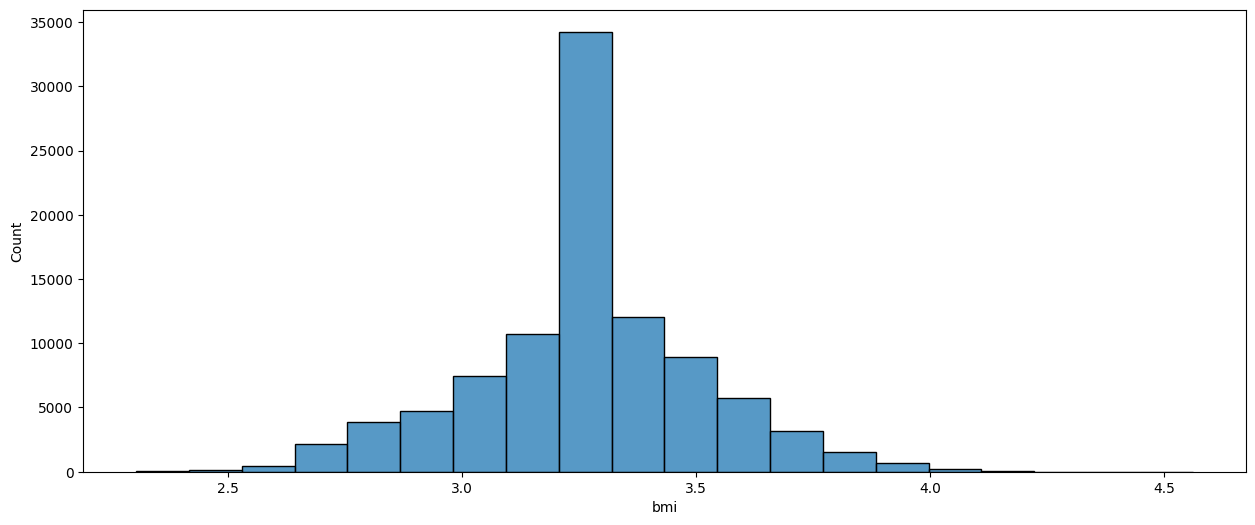

In [23]:
# tranfroming bmi in log scale and ploting the distribution
sns.histplot(np.log(df['bmi']), bins=20)

<Axes: xlabel='bmi_category', ylabel='bmi'>

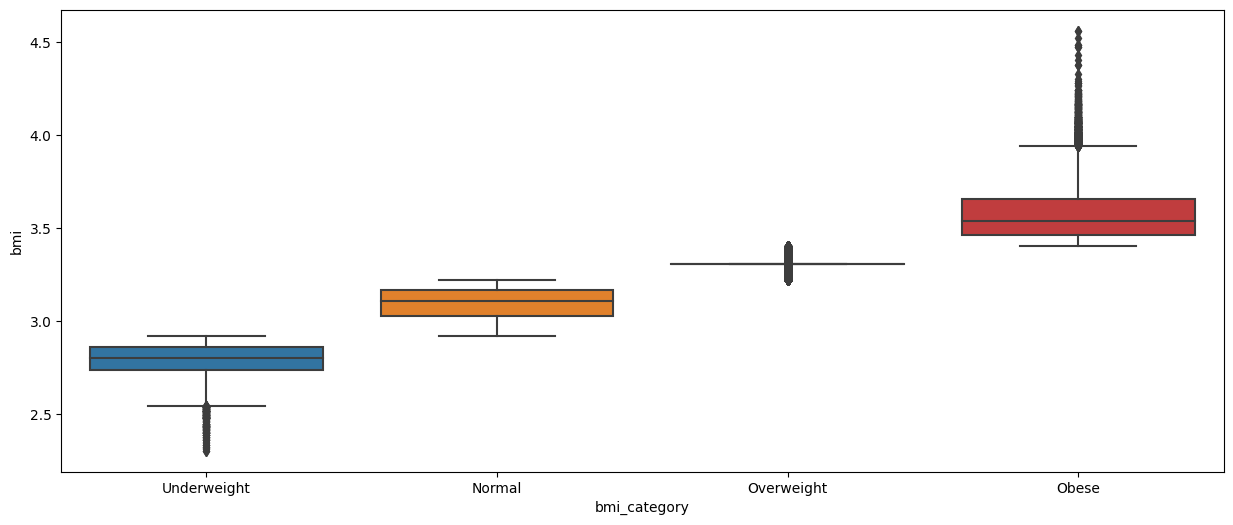

In [24]:
sns.boxplot(df, x='bmi_category', y=np.log(df['bmi']))

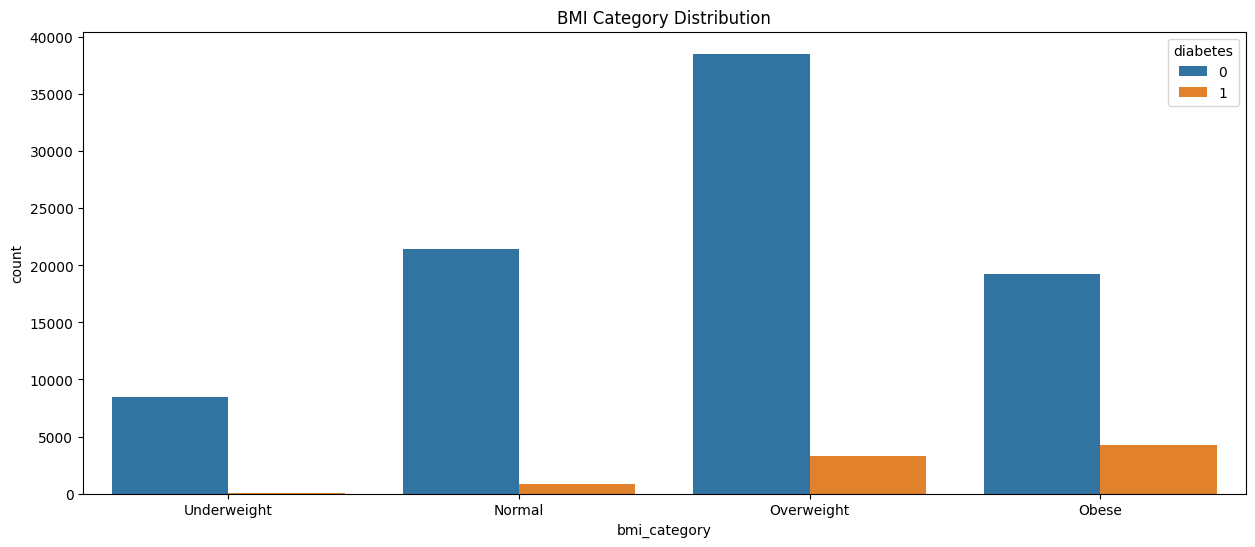

In [179]:
# let's see diabetes in every bmi category
sns.countplot(df, x='bmi_category', hue='diabetes')
plt.title("BMI Category Distribution")
plt.show()

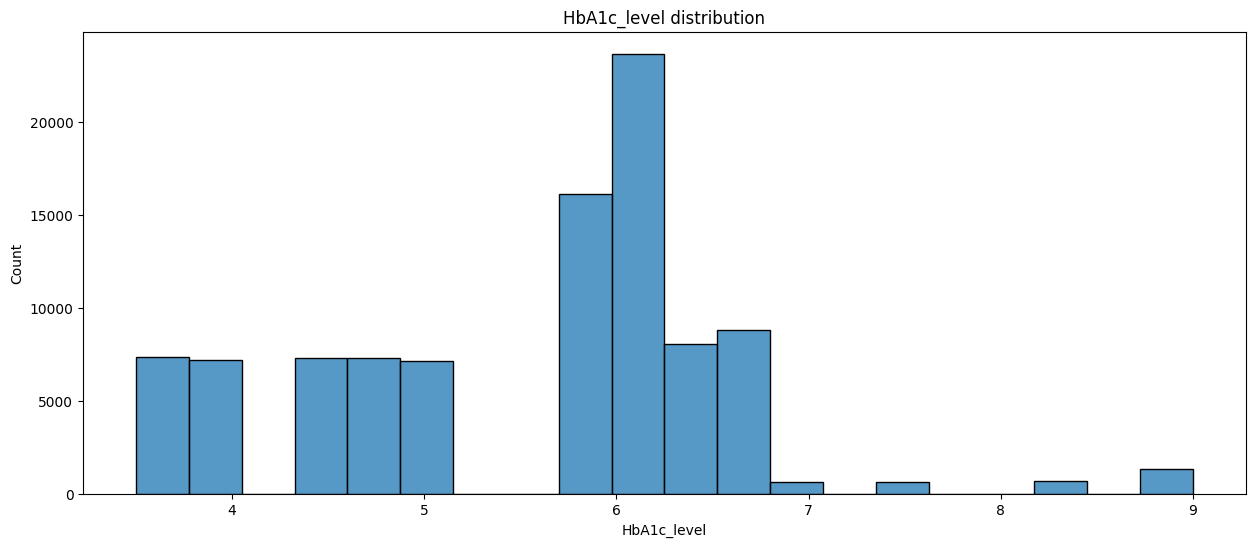

In [163]:
sns.histplot(df, x='HbA1c_level', bins=20)
plt.title("HbA1c_level distribution")
plt.show()

![HB1c_level_chart](https://images.ctfassets.net/9slb9bdvurju/7gXgDXajcyIsoypsNMT1ZF/6c7ff3268b5828756571030ee8789b7b/A1c8.png)\
[HB1c_level_chart](https://images.ctfassets.net/9slb9bdvurju/7gXgDXajcyIsoypsNMT1ZF/6c7ff3268b5828756571030ee8789b7b/A1c8.png)

In [27]:
# making HBa1c level in 3 categories 
bins = [0, 5.7, 6.4, 100]
labels = ['optimal', 'elevated', 'high']
df['HbA1c_level_category'] = pd.cut(df['HbA1c_level'], bins=bins, labels=labels)

<Axes: xlabel='HbA1c_level_category', ylabel='count'>

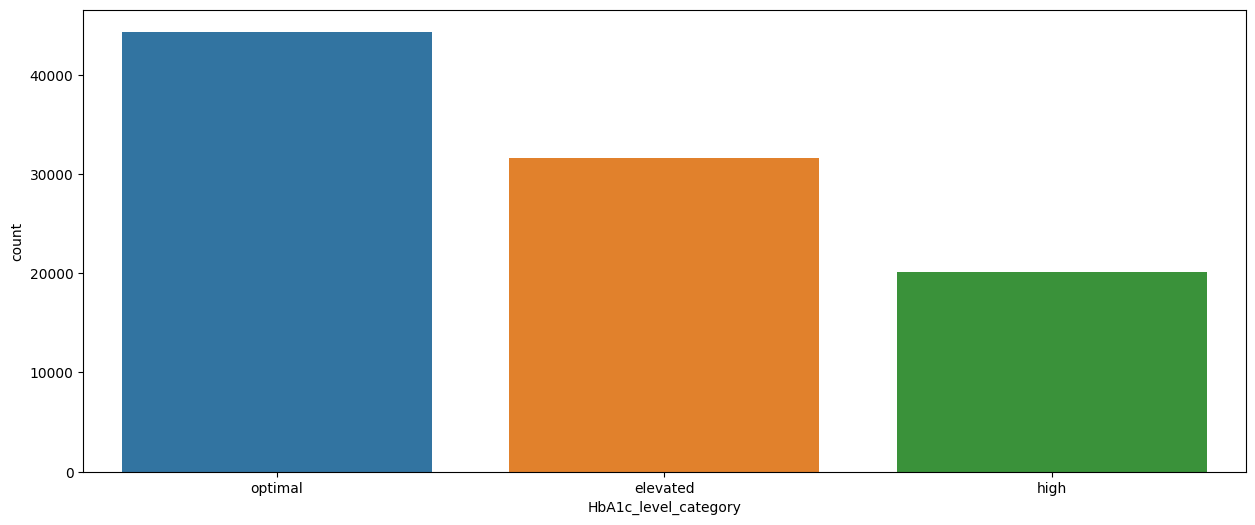

In [28]:
sns.countplot(df, x='HbA1c_level_category')

<Axes: xlabel='HbA1c_level_category', ylabel='count'>

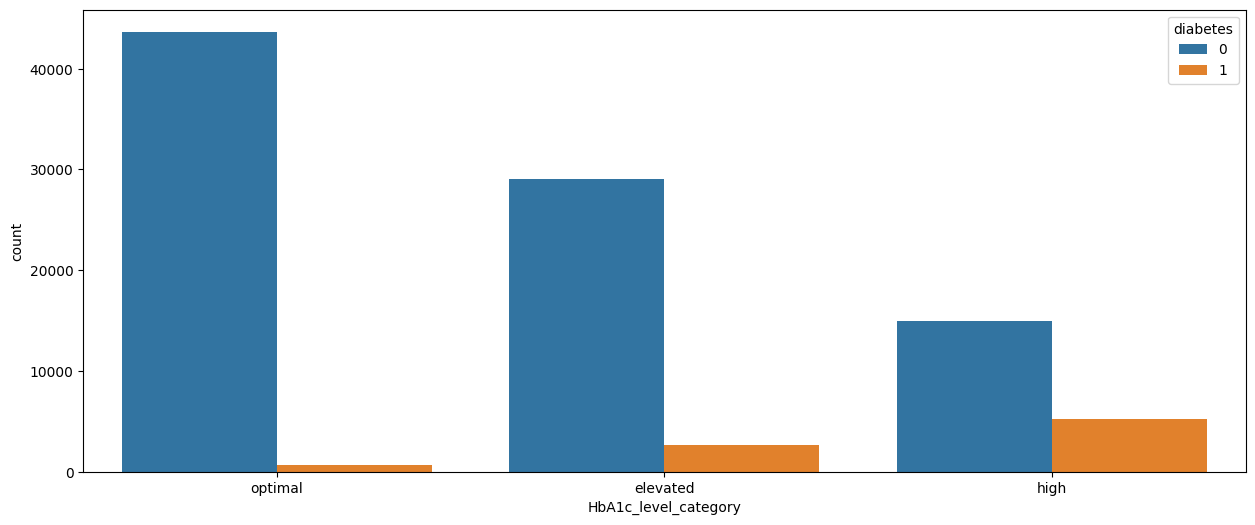

In [29]:
sns.countplot(df, x='HbA1c_level_category', hue='diabetes')

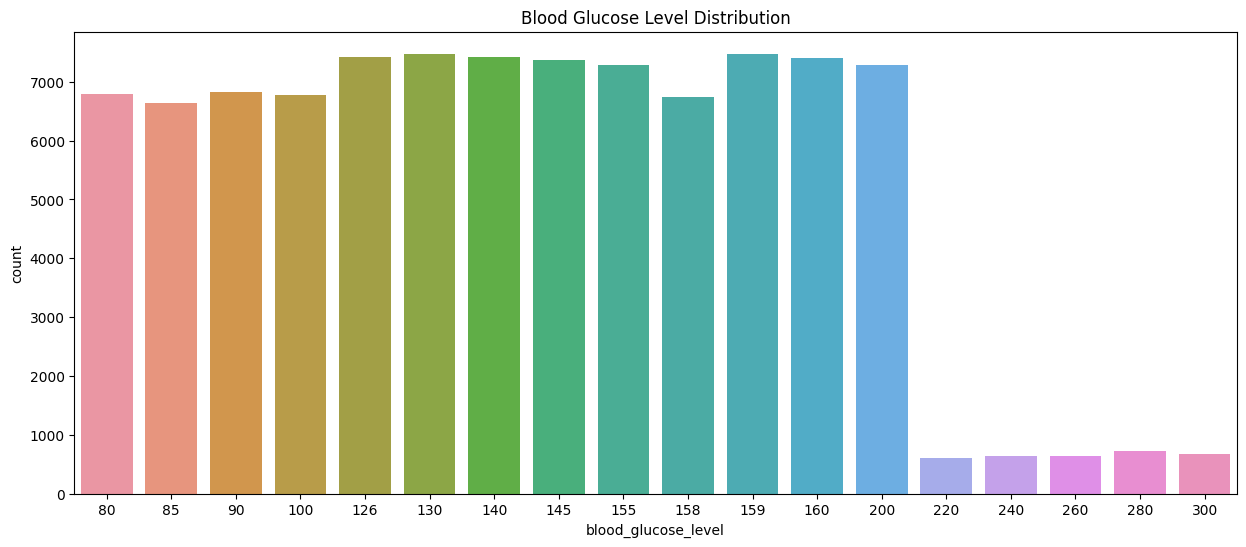

In [164]:
sns.countplot(df, x='blood_glucose_level')
plt.title("Blood Glucose Level Distribution")
plt.show()

![blood_glocose_chart](https://assets-global.website-files.com/622154d5a1d5c02e596f4511/62f2bee4de0117f1ec10c745_BloodGlucoseChart.jpeg)\
[blood_glocose_chart](https://assets-global.website-files.com/622154d5a1d5c02e596f4511/62f2bee4de0117f1ec10c745_BloodGlucoseChart.jpeg)

We have patients with blood glucose level above 200.

<Axes: >

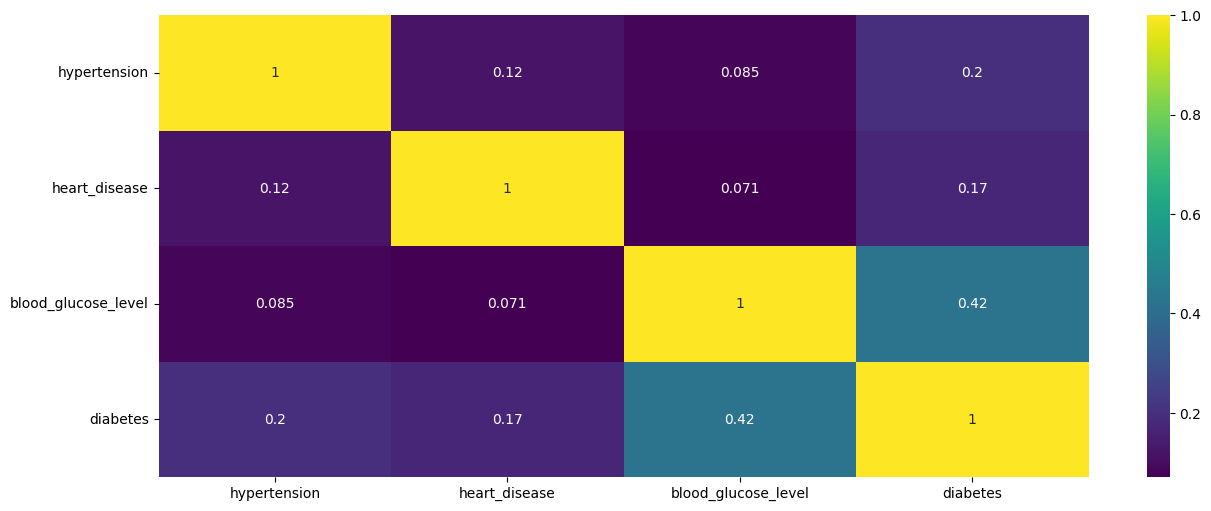

In [32]:
# bllod Glucose lever, blood desies, hypertenstion and diabetes distribution looks same, lets see the correlation
sns.heatmap(df[["hypertension", "heart_disease", "blood_glucose_level", "diabetes"]].corr(), annot=True, cmap='viridis')

Diabetes and blood_glucose_level are positively correlated.
Other than that, there is positive correlation between other variables but it's not too much strong.

* diabetes

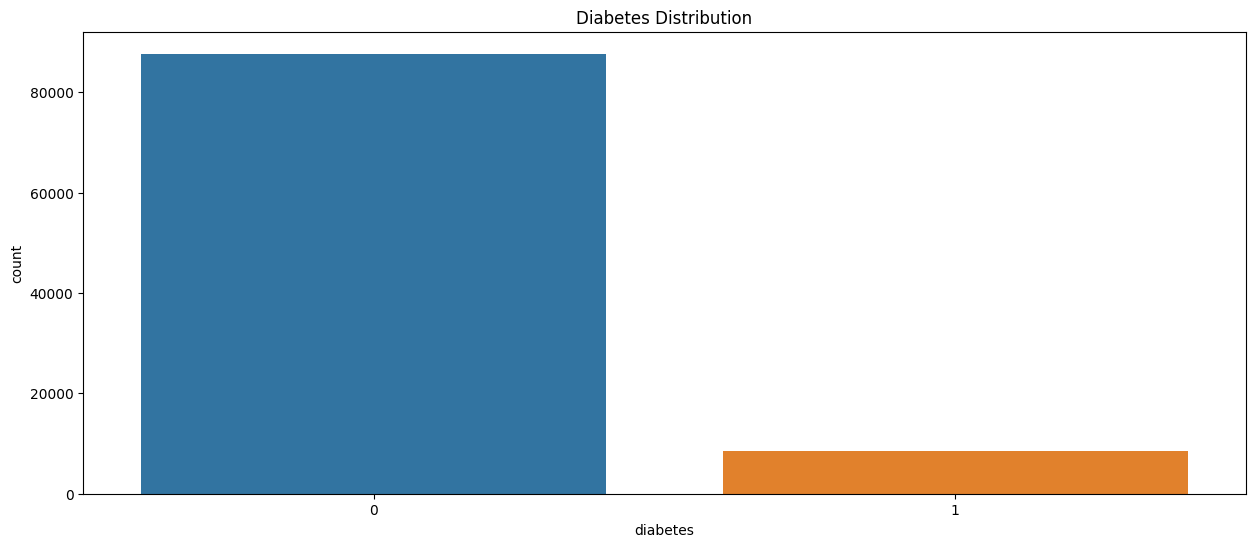

In [165]:
sns.countplot(df, x='diabetes')
plt.title("Diabetes Distribution")
plt.show()

# Trend between age and HbA1c_level

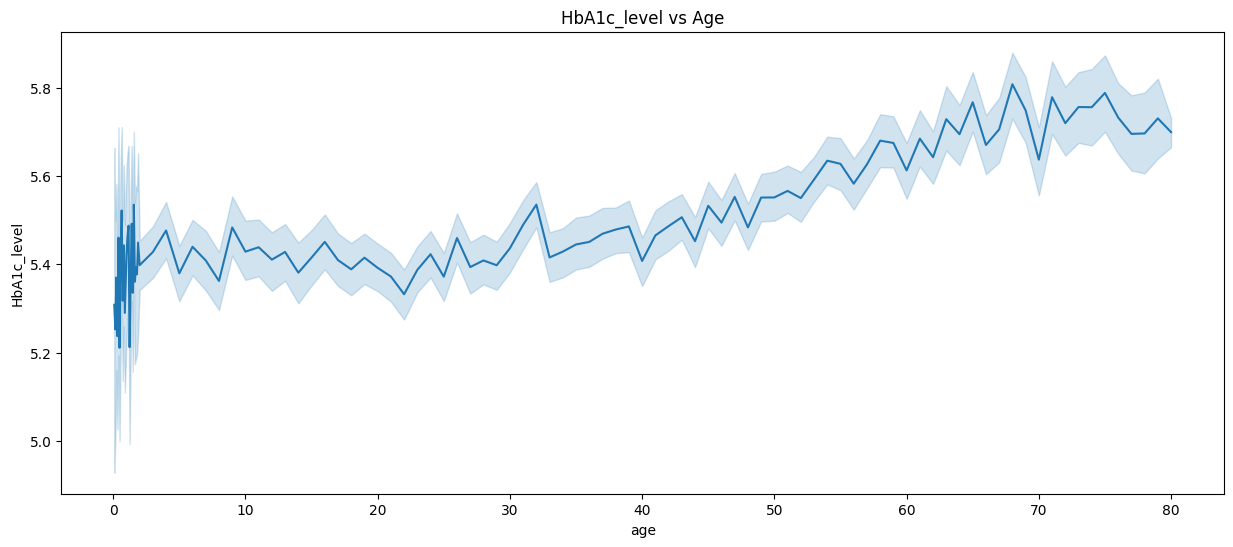

In [38]:
sns.lineplot(df, x='age', y='HbA1c_level')
plt.title("HbA1c_level vs Age")
plt.show()

* Draw sunbust on df clumns gender, diabetes_categorical, smoking_history


In [143]:

fig = px.sunburst(
   df,
    path=['gender', 'age_cateogry','hypertension_categorical','heart_disease_categorical'],
    values= 'diabetes',
    color='gender',
)

# Show the Sunburst chart
fig.show()

## Insights
* The observation on basis of gender is as follows:
### Female: 4447
* Old_age : 3464 Diabetic Patients
* Middle : 812 Diabetic Patients
* Youngs : 119 Diabetic Patients
* teenagers : 35 Diabetic Patients

### Male: 4035
* Old_age : 3170 Diabetic Patients
* Middle : 735 Diabetic Patients
* Youngs : 90 Diabetic Patients
* teenagers : 28 Diabetic Patients

### Others: 0

### Q1. Comparatively who has more Diabetes?
A. Based on given data females has more diabetes than male.

In [133]:
fig = px.sunburst(
   df,
    path=['gender', 'age_cateogry','hypertension_categorical','heart_disease_categorical'],
    values= 'heart_disease',
    color='gender',
)

# Show the Sunburst chart
fig.show()


### Q2. Comparatively who has more heart_disease?
A. Based on given data male has more heart issues than female.
* Male: 2367
* Female: 1556
* Others: 0

In [134]:
fig = px.sunburst(
   df,
    path=['gender', 'age_cateogry','hypertension_categorical','heart_disease_categorical'],
    values= 'hypertension',
    color='gender',
)

# Show the Sunburst chart
fig.show()


### Q3. Comparatively who has more hypertension?
A. Based on given data female has more heart issues than male.
* Female: 4179
* Male: 3282
* Others: 0

In [135]:
fig = px.sunburst(
   df,
    path=['hypertension_categorical','heart_disease_categorical','gender', 'age_cateogry'],
    values= 'diabetes',
    color='gender',
)

# Show the Sunburst chart
fig.show()

### Q4. People with Hypertension and Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, Male has more Diabetes.
  * Male : 194
  * Female : 164

### Q5. People with no Hypertension and no Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, female has more Diabetes.
* Male 2518
* Female 2969

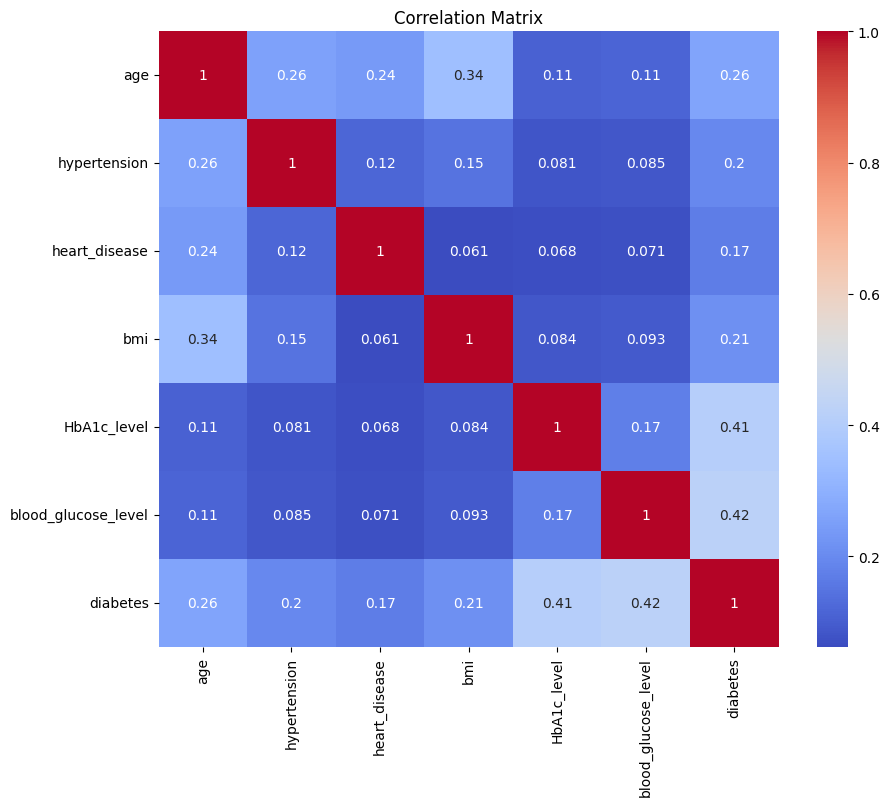

In [136]:

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Observing Age with BMI, HbA1c_level, and blood_glucose_level
* On the basis of data, by increasing age bmi also increases.
*  On the basis of data, Positive low corelation between age and HbA1c_level.
*  On the basis of data, Positive low corelation between age and blood_glucose_level.
  

In [139]:
df.drop(df[df['smoking_history'] == 'No Info'].index, inplace=True) 

In [142]:
fig = px.sunburst(
   df[df['smoking_history']!='No info'],
    path=['smoking_history','hypertension_categorical','heart_disease_categorical','gender', 'age_cateogry'],
    values= 'diabetes',
    color='gender',
)

# Show the Sunburst chart
fig.show()

### Q6. On the basis of gender who had more diabetes that were smoking, had heart disease and hypertension?
A. Based on Data people who were smoking, had heart diesease and hypertension, male were having higher rate of Diabetes.
* Male: 28
* Female: 15

### Q7. On the basis of gender who had more diabetes that never smoked?
A. Based on Data people who never smoked, female were having higher rate of Diabetes.
* Female: 1288
* Male: 868


---
# `Summary` 

### Q1. Comparatively who has more Diabetes?
A. Based on given data females has more diabetes than male.

### Q2. Comparatively who has more heart_disease?
A. Based on given data male has more heart issues than female.
* Male: 2367
* Female: 1556
* Others: 0


### Q3. Comparatively who has more hypertension?
A. Based on given data female has more heart issues than male.
* Female: 4179
* Male: 3282
* Others: 0


### Q4. People with Hypertension and Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, Male has more Diabetes.
  * Male : 194
  * Female : 164

### Q5. People with no Hypertension and no Heart-disease on the basis of gender, who got more diabetes?
A. Based on Data people with Hypertension and Hear_disease, female has more Diabetes.
* Male 2518
* Female 2969

### Q6. On the basis of gender who had more diabetes that were smoking, had heart disease and hypertension?
A. Based on Data people who were smoking, had heart diesease and hypertension, male were having higher rate of Diabetes.
* Male: 28
* Female: 15

### Q7. On the basis of gender who had more diabetes that never smoked?
A. Based on Data people who never smoked, female were having higher rate of Diabetes.
* Female: 1288
* Male: 868


# `Conclusion`:
Based on the given data, here are the conclusions for each question:

- Comparatively, females have more diabetes than males.

- Comparatively, males have more heart disease than females.

- Comparatively, females have more hypertension than males.

-  Among people with both hypertension and heart disease, males have more diabetes than females.

-  Among people with neither hypertension nor heart disease, females have more diabetes than males.

-  Among individuals who were smoking, had heart disease, and hypertension, males have a higher rate of diabetes compared to females.

- Among individuals who never smoked, females have a higher rate of diabetes compared to males.